머신러닝/선형회귀

[kaggle] Boston 부동산 집 값 예측

보스턴 부동산 데이터의 특징들(Features)

1) CRIM: 도시별 범죄발생률

2) ZN: 25,000평을 넘는 토지의 비율

3) INDUS: 도시별 비상업 지구의 비유

4) CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)

5) NOX: 일산화질소 농도

6) RM: 주거할 수 있는 평균 방의개수

7) AGE: 1940년 이전에 지어진 주택의 비율

8) DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리

9) RAD: 고속도로의 접근 용이성에 대한 지표

10) TAX: 10,000달러당 재산세 비율

11) PTRATIO: 도시별 교사와 학생의 비율

12) B: 도시의 흑인 거주 비유

13) LSTAT: 저소득층의 비율

14) MEDV: 본인 소유 주택 가격의 중앙값


Kaggle 보스턴 부동산 가격 데이터는 [ https://www.kaggle.com/vikrishnan/boston house prices ]에서 다운로드하엿고, 실습 데이터는 1970 년도의 보스턴 지역의 집값을 나타내는 데이터로 Regression 알고리즘을 이용 보스턴 부동산 가격 예측실습

scikitlearn 을 이용해서 상황에 따른 적절한 모델 Estimator)선택하기
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# 필요한 라이브러리 임폴트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# 데이터 확인
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [ ]:
boston.data.shape #506개의 집값과 13개의 feature 컬럼의 dataset(14번-MEDV 중앙값을  제외하고 )

(506, 13)

In [ ]:
# 데이터 정규화 - MinMaxScaler()
# 피처들의 데이터 수준을 맞춰주기 위해서 MinMaxScaler 수행
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# make extend boston dataset
# Refernce : https://github.com/amueller/mglearn/blob/master/mglearn/datasets.py#L30
def load_extended_boston():
    boston = load_boston() #보스톤데이터 로드
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)#값의 범위를 통일성 잇게 만들어서
    # Feature Generation degree = 2
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    # 13개의 Feature를 2개씩,제곱씩 여러개의 feature를 조합해서 확장된 feature를 추가해주게 된다.조합을 만든다
    # 다양한 Feature 정보를 머신러닝 모델에게 제공할 수 잇기 때문에 큰 성능 향상 기대
    return X, boston.target

In [ ]:
# 특징이 확장된 보스턴 부동산 가격 데이터 불러오기
X, y = load_extended_boston()
print('Extended Feature Shape :', X.shape) #확장된 집값 506개
print(X)
print(y)

Extended Feature Shape : (506, 104)
[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#baseline 성능
#실습파일 : 3-3-2.Regression_boston_house_price_pred(EDA_Feature Selection)_cvs.ipynb
#baseline #1 - Average MSE : 37.1318(기본 Linear Regression)
#baseline #2 - Average MSE : 34.10008 (기본 Linear Regression + Feature Selection 적용)

In [ ]:
from sklearn.model_selection import KFold #KFold 실습해보기

num_split = 5
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
kf = KFold(n_splits=num_split)  

tot_MSE = 0.0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 선형회귀(Linear Regression) 모델 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측 수행하기
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 측정 수행하기
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred)

# 평균 에러 구하기    
avg_MSE = tot_MSE / num_split 
print('Average MSE :', avg_MSE)
print('Avergae RMSE :', np.sqrt(avg_MSE))

Average MSE : 131.74003779482874
Avergae RMSE : 11.477806314571994


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[10.0, 1.0, 0.1, 0.01, 0.001]} #하이퍼 파라메터 후보군을 만들어서 튜닝할 수 있다, 5가지 경우의 수를 만들어서 선형회귀를~
clf = GridSearchCV(ridge_reg, parameters) # GridSearchCV로 예측모형 추정할 수 있다
clf.fit(X_train, y_train)
cv_results_df = pd.DataFrame(clf.cv_results_)
cv_results_df #0.1 일때 5가지 경우의 수중 가장 좋다

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011588,0.002100,0.000724,0.000088,10.0,{'alpha': 10.0},0.737643,0.583233,0.531610,0.734554,0.171778,0.551764,0.206760,2
1,0.008000,0.001914,0.000705,0.000044,1.0,{'alpha': 1.0},0.804409,0.540890,0.727543,0.873599,0.054261,0.600140,0.294697,1
2,0.011633,0.002983,0.000714,0.000035,0.1,{'alpha': 0.1},0.767738,0.237467,0.772387,0.877425,-0.384976,0.454008,0.475365,3
3,0.013275,0.003906,0.000824,0.000145,0.01,{'alpha': 0.01},0.520495,0.575178,0.713681,0.859985,-1.329861,0.267896,0.807508,4
4,0.008659,0.002895,0.000724,0.000037,0.001,{'alpha': 0.001},0.359384,-4.992546,0.725865,0.843742,-1.328415,-0.878394,2.200012,5


In [ ]:
from sklearn.linear_model import Ridge #Ridge 실습해보기

# Ridge Regression Estimator 선언하기
ridge_reg = Ridge(alpha=0.1)  #(alpha=0.1)로 튜닝하면 훨씬 낮은값 나옴. 기본값은 1.0

ridge_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행하기
y_pred = ridge_reg.predict(X_test)

# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 60.141795972472266
RMSE : 7.75511418178174


In [ ]:
from sklearn.linear_model import Ridge #Ridge 실습해보기

# Ridge Regression Estimator 선언하기
ridge_reg = Ridge(alpha=1)  #(alpha=0.1)로 튜닝하면 훨씬 낮은값 나옴. 기본값은 1.0

ridge_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행하기
y_pred = ridge_reg.predict(X_test)

# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 11.767884222794143
RMSE : 3.4304349903174294


In [ ]:
from sklearn.linear_model import Ridge #Ridge 실습해보기

# Ridge Regression Estimator 선언하기
ridge_reg = Ridge(alpha=10)  #(alpha=0.1)로 튜닝하면 훨씬 낮은값 나옴. 기본값은 1.0

ridge_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행하기
y_pred = ridge_reg.predict(X_test)

# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 17.066530660942664
RMSE : 4.131165775049782


In [ ]:
from sklearn.linear_model import Lasso #Lasso 실습해보기

# Lasso Regression Estimator 선언하기
lasso_reg = Lasso(alpha=0.001)

lasso_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lasso_reg.predict(X_test)

# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 125.28723952736155
RMSE : 11.193178258535935


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+02, tolerance: 3.481e+00
  model = cd_fast.enet_coordinate_descent(


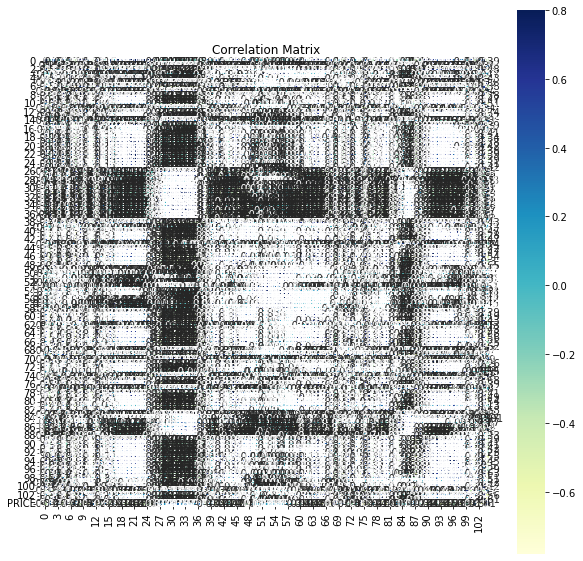

In [ ]:
boston_house_df = pd.DataFrame(X.copy())
boston_house_df['PRICE'] = y

corr = boston_house_df.corr()  # 상관분석 실습해보기-상관 분석 (Correlation analysis):두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
plt.figure(figsize=(10, 10));
sns.heatmap(corr,   #seabon의 heatmap함수 이용 "Correlation Matrix"를 그려본다
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Correlation Matrix'); # 가격과 양의 상관관계에 따라, 저소득층 비율은 가격과 연과관계가 있다는 것을 알 수 있다

In [ ]:
from sklearn.linear_model import Ridge #Ridge 실습해보기

ridge_reg = Ridge(alpha=0.1)  #(alpha=0.1)로 튜닝하면 훨씬 낮은값 나옴. 기본값은 1.0

ridge_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행하기
y_pred = ridge_reg.predict(X_test)

# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE) #MSE 값이 훨씬 낮아진다
print('RMSE :', RMSE)

MSE : 60.141795972472266
RMSE : 7.75511418178174
